# Análise de mudanças climáticas

https://docs.microsoft.com/en-us/learn/modules/analyze-climate-data-with-azure-notebooks/0-introduction

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns; sns.set()

print("Setup completo")

Setup completo


In [2]:
!curl https://a4r.blob.core.windows.net/public/notebook-resources.zip -o notebook-resources.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   836  100   836    0     0   1048      0 --:--:-- --:--:-- --:--:--  1047


In [3]:
yearsBase, meanBase = np.loadtxt('/kaggle/input/climatechance/5-year-mean-1951-1980.csv', delimiter=',', usecols=(0, 1), unpack=True)
years, mean = np.loadtxt('/kaggle/input/climatechance/5-year-mean-1882-2014.csv', delimiter=',', usecols=(0, 1), unpack=True)

### Plotando um Scatter

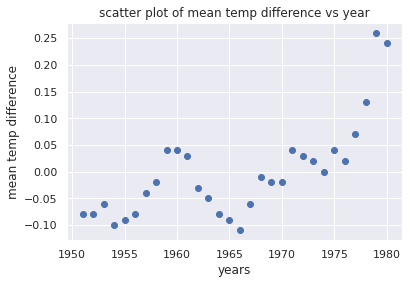

In [4]:
plt.scatter(yearsBase, meanBase)
plt.title('scatter plot of mean temp difference vs year')
plt.xlabel('years', fontsize=12)
plt.ylabel('mean temp difference', fontsize=12)
plt.show()

### Adicionando uma regressão linear com Numpy

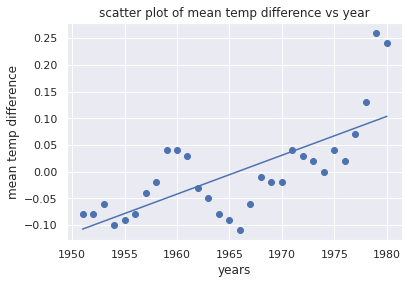

 y = 0.007279199110122247 * x + -14.309265850945273


In [5]:
# Creates a linear regression from the data points
m,b = np.polyfit(yearsBase, meanBase, 1)

# This is a simple y = mx + b line function
def f(x):
    return m*x + b

# This generates the same scatter plot as before, but adds a line plot using the function above
plt.scatter(yearsBase, meanBase)
plt.plot(yearsBase, f(yearsBase))
plt.title('scatter plot of mean temp difference vs year')
plt.xlabel('years', fontsize=12)
plt.ylabel('mean temp difference', fontsize=12)
plt.show()

# Prints text to the screen showing the computed values of m and b
print(' y = {0} * x + {1}'.format(m, b))
plt.show()

### Adicionando regressão linear com Scikit Learn

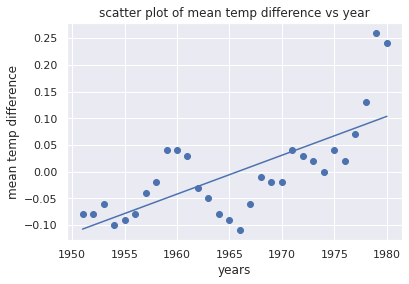

 y = 0.007279199110122357 * x + -14.309265850945492


In [6]:
# Pick the Linear Regression model and instantiate it
model = LinearRegression(fit_intercept=True)

# Fit/build the model
model.fit(yearsBase[:, np.newaxis], meanBase)
mean_predicted = model.predict(yearsBase[:, np.newaxis])

# Generate a plot like the one in the previous exercise
plt.scatter(yearsBase, meanBase)
plt.plot(yearsBase, mean_predicted)
plt.title('scatter plot of mean temp difference vs year')
plt.xlabel('years', fontsize=12)
plt.ylabel('mean temp difference', fontsize=12)
plt.show()

print(' y = {0} * x + {1}'.format(model.coef_[0], model.intercept_))

### Analisando com Seaborn

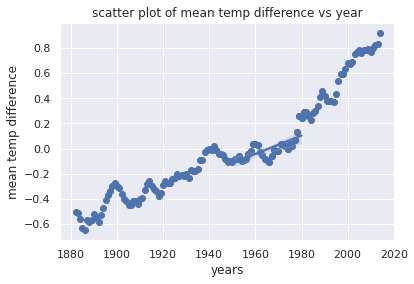

In [8]:
plt.scatter(years, mean)
plt.title('scatter plot of mean temp difference vs year')
plt.xlabel('years', fontsize=12)
plt.ylabel('mean temp difference', fontsize=12)
sns.regplot(yearsBase, meanBase)
plt.show()